In [ ]:
!pip install tensorflow 

In [9]:
!pip install opencv-python

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)


You should consider upgrading via the 'c:\users\asus rog\projects\image classifier\im\scripts\python.exe -m pip install --upgrade pip' command.


In [10]:
!pip install matplotlib

  Using cached matplotlib-3.7.0-cp38-cp38-win_amd64.whl (7.7 MB)
  Using cached Pillow-9.4.0-cp38-cp38-win_amd64.whl (2.5 MB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached contourpy-1.0.7-cp38-cp38-win_amd64.whl (162 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


You should consider upgrading via the 'c:\users\asus rog\projects\image classifier\im\scripts\python.exe -m pip install --upgrade pip' command.


In [21]:
import tensorflow as tf
import os

In [22]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [23]:
import cv2
import imghdr

In [24]:
data_dir='data'

In [25]:
image_exts=['jpeg','jpg','bmp','png']

In [26]:
from matplotlib import pyplot as plt

In [27]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [28]:
import numpy as np

In [29]:
data=tf.keras.utils.image_dataset_from_directory('data')

Found 178 files belonging to 2 classes.


In [30]:
data_iterator=data.as_numpy_iterator()

In [31]:
batch=data_iterator.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


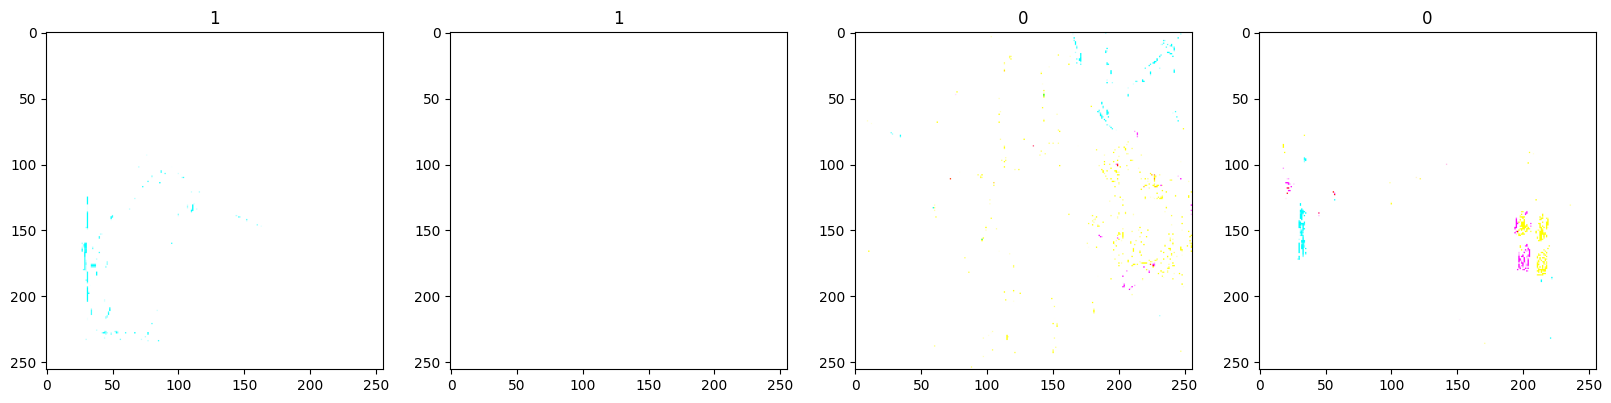

In [35]:
fir, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [33]:
#scaling the data
data=data.map(lambda x,y:(x/255,y))

In [34]:
data.as_numpy_iterator().next()

(array([[[[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [9.88235295e-01, 9.88235295e-01, 9.88235295e-01],
          [9.93137240e-01, 9.93137240e-01, 9.93137240e-01]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [9.88235295e-01, 9.88235295e-01, 9.88235295e-01],
          [9.93137240e-01, 9.93137240e-01, 9.93137240e-01]],
 
         [[1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          [1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
          ...,
          [1.00000000e+00, 1.00000000e+00, 1.0000

In [36]:
#splitting the data
len(data)

6

In [43]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [45]:
test_size+val_size+train_size

6

In [46]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [48]:
#Building deep learnign model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [49]:
model=Sequential()

In [50]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [54]:
logdir='logs'

In [56]:
tensorboard_callbacks=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [58]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callbacks])

Epoch 1/20
4/4 [==============================] - 11s 1s/step - loss: 1.3325 - accuracy: 0.5469 - val_loss: 1.3397 - val_accuracy: 0.4375
Epoch 2/20
4/4 [==============================] - 7s 2s/step - loss: 0.8063 - accuracy: 0.5156 - val_loss: 0.6759 - val_accuracy: 0.5625
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.6191 - accuracy: 0.6094 - val_loss: 0.5785 - val_accuracy: 0.7188
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.5525 - accuracy: 0.6641 - val_loss: 0.4819 - val_accuracy: 0.8750
Epoch 5/20
4/4 [==============================] - 7s 2s/step - loss: 0.4654 - accuracy: 0.8438 - val_loss: 0.3545 - val_accuracy: 0.9375
Epoch 6/20
4/4 [==============================] - 5s 1s/step - loss: 0.3501 - accuracy: 0.8984 - val_loss: 0.2205 - val_accuracy: 0.9688
Epoch 7/20
4/4 [==============================] - 7s 1s/step - loss: 0.2783 - accuracy: 0.9375 - val_loss: 0.1506 - val_accuracy: 1.0000
Epoch 8/20
4/4 [========================

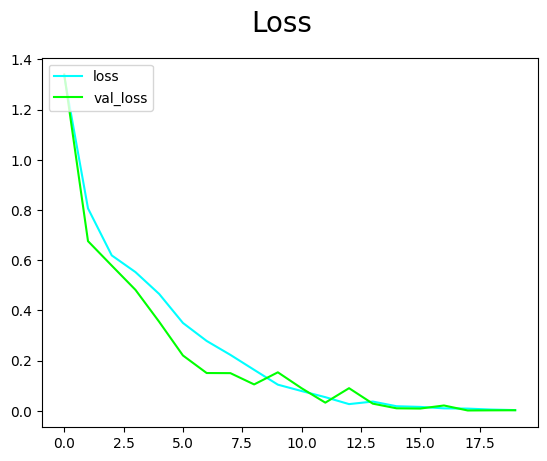

In [61]:
#Plotting performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='aqua', label='loss')
plt.plot(hist.history['val_loss'], color='lime', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

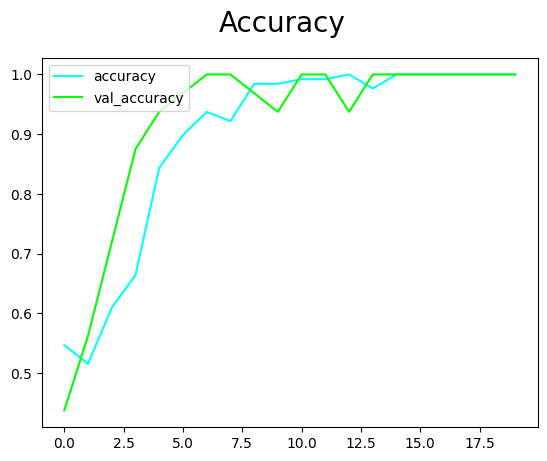

In [62]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='aqua', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='lime', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [64]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [65]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [66]:
len(test)

1

In [67]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 355ms/step


In [69]:
m

1.0 1.0 1.0


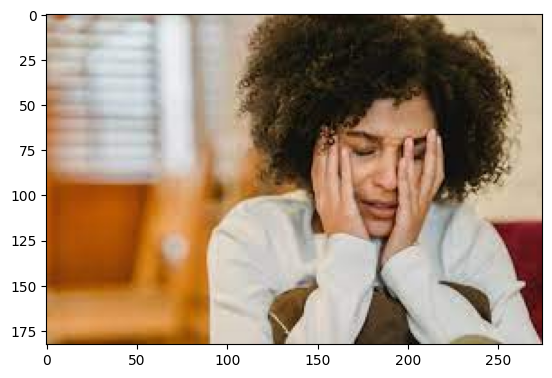

In [82]:
img=cv2.imread('images.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

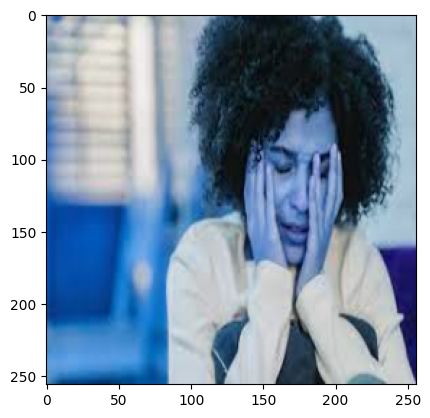

In [83]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [84]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 27ms/step


In [85]:
yhat

array([[0.99680096]], dtype=float32)

In [86]:
if yhat > 0.75: 
    print(f'Very Mildly Demented')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [75]:
from tensorflow.keras.models import load_model

In [80]:
model.save(os.path.join('models','Image_classifier.h5'))